In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [2]:
#60 Timesteps -> 60 MA? Past 60 Days

In [3]:
X_train = []
y_train = []

#For Loop to save the past i - 60 days of Stock Prices (X values) together with i price (y). [Train Model with Past 60 days
#price to predict price of i]
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [4]:
#Reshaping X_train into -> (sample size = 1198, timesteps == 60, num_features == 1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Initialising RNN

In [ ]:
regressor = Sequential()

## First LSTM layer with Dropout Regularisation

In [6]:
#Units -> Neurons -> Higher Dimensionality
#Set return_sequences = True -> Stacked LSTM Network
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#20% of neurons will be dropped out after each iteration of training
regressor.add(Dropout(rate = 0.2))

## Second and Third LSTM layer with Dropout Regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

## Fourth LSTM (Last LSTM) Layer

In [10]:
#Set return_sequence = False for last layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

## Output Layer

In [11]:
regressor.add(Dense(units = 1))

## Compiling the RNN

In [13]:
#RMSProp is a good optimiser for RNN (Usually)
#Loss is MSE because it is a Regressor Problem, not cross_entropy
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 6s 43ms/step - loss: 0.0417
Epoch 2/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0073
Epoch 3/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0060
Epoch 4/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0060
Epoch 5/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0060
Epoch 6/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0057
Epoch 8/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0049
Epoch 11/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0052
Epoch 12/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0051
Epoch 13/100
38/38 [=====

In [15]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_values = dataset_train.iloc[:, 1:2].values

In [30]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_train) - 60:].values

In [33]:
inputs = inputs.reshape(-1,1)
#Do Not Fit_transform as data leakage will occur
inputs = sc.transform(inputs)

In [36]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [37]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [41]:
predictions = regressor.predict(X_test)
#Inverse transform values
predictions = sc.inverse_transform(predictions)

array([[768.84973],
       [766.3707 ],
       [766.31476],
       [767.2335 ],
       [769.8338 ],
       [774.73425],
       [779.2754 ],
       [781.0395 ],
       [781.2381 ],
       [780.97144],
       [780.71075],
       [780.4766 ],
       [780.4043 ],
       [781.05426],
       [782.16   ],
       [786.495  ],
       [792.84674],
       [799.56396],
       [803.19635],
       [799.6757 ]], dtype=float32)

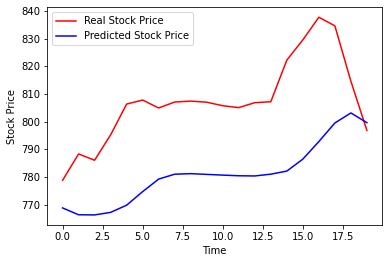

In [52]:
plt.plot(dataset_test['Open'], color = 'red', label = 'Real Stock Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()